### Side Quest A. Experiment to Calculate Fabric Dampening (WIP)
Side Experiment: To achieve the effect of fabric dampening, we calculate the frequency response of the fabric by deconvoluting the
convolved recording (i.e. recording when a fabric is placed between the speaker and the microphone) against the "clean" recording
(recording with nothing between the speaker and the microphone)

Content:
- [Step 1: Time-Align Recorded Samples](#step-1-time-align-recorded-samples)
- [Step 2: Deconvolve recordings through fabric against recording without fabric](#step-2-deconvolve-recordings-through-fabric-against-recording-without-fabric)
- [Step 3: Reconvolve Audio with Calculated Impulse Response (Sanity Check)](#step-3-reconvolve-audio-with-calculated-impulse-response-sanity-check)
- [Try it Yourself - Convolve Your Own Audio!](#convolve-your-own-audio)

In [1]:
## change working folder to root
import os
os.chdir("/Users/angjunsiong/Desktop/FAST")

from src.ir_convolve import ir_convolve
from src.time_alignment import time_aligner
from src.ir_fr_generator import impulse_generator
from src.helper_functions import *
import torch
import torchaudio


In [2]:
# Prep work to resample audio to match that of sine sweep (44100Hz)
# folder = "./data/fabric_experiment/run2_recording"
# target_frequency = 44100

# for file in os.listdir(folder):
#     if "wav" in file:
#         data, sr = torchaudio.load(os.path.join(folder,file))
#         data_new = torchaudio.functional.resample(waveform=data,
#                                     orig_freq=sr,
#                                     new_freq=target_frequency,
#                                     resampling_method="sinc_interp_kaiser"
#                                     )
        
#         torchaudio.save(f"./data/resample/{file}", 
#                 data_new, 
#                 sample_rate = target_frequency,
#                 format="wav", 
#                 encoding="PCM_S", 
#                 bits_per_sample=16)

#### Step 1: Time-Align Recorded Samples
Background: Before the deconvolution process, we first perform a time alignment between the recorded clips
This approach applies calculates the correlation of the spectrograms "pixels" (i.e. magnitude) and determine the time shift between the clips.

The alternate approach uses a correlation of the wave form, which is not optimal as the wave form is substantially altered from the fabric dampening. 

In contrast, the "exponential" upward shape of the sine sweep remains apparent even after the dampening effect. The imprints on the spectrogram is visually observed to be very clear, suggesting that this method would be more viable

Note: Another method involves inserting a sharp impulse before the start of the sine sweep, and then performing the same technique (i.e. spectrogram cross-relation). However, this was not implemented before the experiments were conducted. The additional precision might be negligible, however, since (as mentioned) the sine sweep curve is already clearly visible.

In [4]:
# 1st run: Align time segments between original sine sweep and the reference (recording without any fabric)
time_aligner(reference_path="./data/fabric_experiment/references/run1_original_sweep.wav",
             input_folder="./data/fabric_experiment/run1_no_fabric_alignment",
             output_folder="./data/fabric_experiment/references", 
             preview_spec=False)

 1 files found in folder ./data/fabric_experiment/run1_no_fabric_alignment

-------------
Processing file 1 of 1 files: 0Clean_0deg_NoCover.wav
The sampling rates of the reference and the audio to be aligned are both 44100Hz!

Slice 0 Analysis: Clip 0Clean_0deg_NoCover.wav lags behind reference by 793 hops, or 0.5754195011337868s.
Slice 1 Analysis: Clip 0Clean_0deg_NoCover.wav lags behind reference by 794 hops, or 0.5761451247165533s.
Slice 2 Analysis: Clip 0Clean_0deg_NoCover.wav lags behind reference by 795 hops, or 0.5768707482993197s.
Slice 3 Analysis: Clip 0Clean_0deg_NoCover.wav lags behind reference by 795 hops, or 0.5768707482993197s.
Selection Boolean: [np.False_, np.True_, np.True_, np.True_]

*************************
Average of Analyses: Clip 0Clean_0deg_NoCover.wav lags behind reference by average of 0.5766288737717309s
 0Clean_0deg_NoCover_aligned.wav exported!
************************




In [5]:
# 2nd run: Align time segments between aligned (recording without any fabric) with all other recordings
time_aligner(preview_spec=False)

 30 files found in folder ./data/fabric_experiment/run2_recording

-------------
Processing file 1 of 30 files: 7SW_90deg.wav
The sampling rates of the reference and the audio to be aligned are both 44100Hz!

Slice 0 Analysis: Clip 7SW_90deg.wav lags behind reference by 937 hops, or 0.6799092970521542s.
Slice 1 Analysis: Clip 7SW_90deg.wav lags behind reference by 942 hops, or 0.6835374149659864s.
Slice 2 Analysis: Clip 7SW_90deg.wav lags behind reference by 931 hops, or 0.6755555555555556s.
Slice 3 Analysis: Clip 7SW_90deg.wav lags behind reference by 936 hops, or 0.6791836734693878s.
Selection Boolean: [np.True_, np.False_, np.False_, np.True_]

*************************
Average of Analyses: Clip 7SW_90deg.wav lags behind reference by average of 0.679546485260771s
 7SW_90deg_aligned.wav exported!
************************


-------------
Processing file 2 of 30 files: 9LC_90deg.wav
The sampling rates of the reference and the audio to be aligned are both 44100Hz!

Slice 0 Analysis: Cli

#### Step 2: Deconvolve recordings through fabric against recording without fabric
This is the simpler part, to obtain impulse / freq response of fabric

GENERATING IMPULSE!!

31 files detected in input folder ./data/fabric_experiment/aligned_run2_recordings/


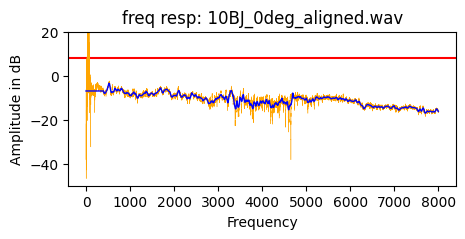

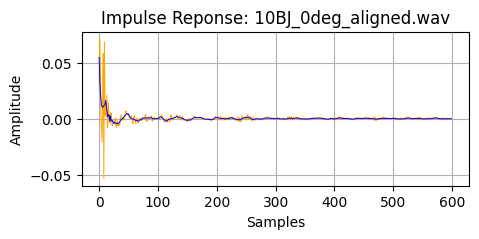

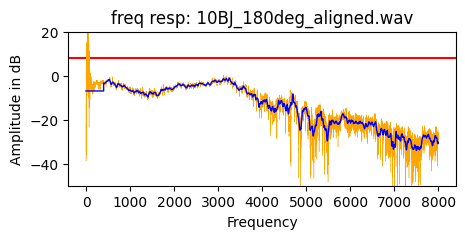

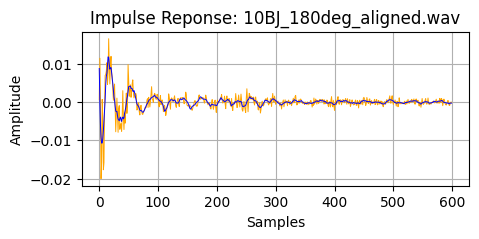

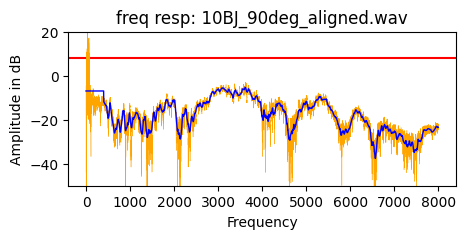

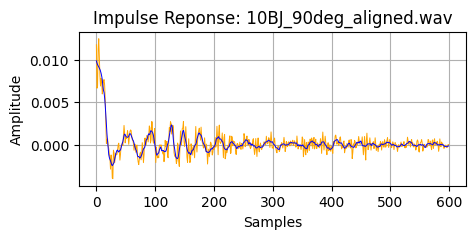

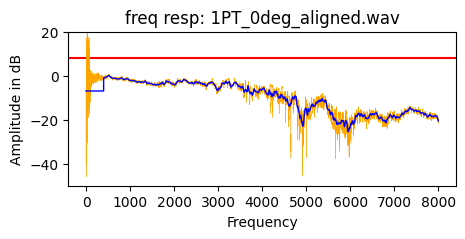

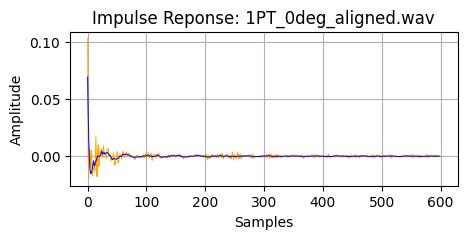

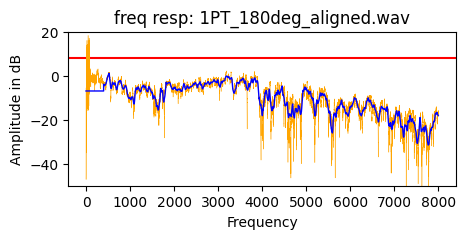

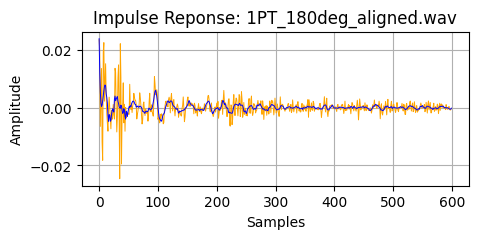

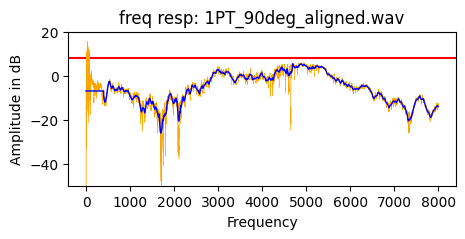

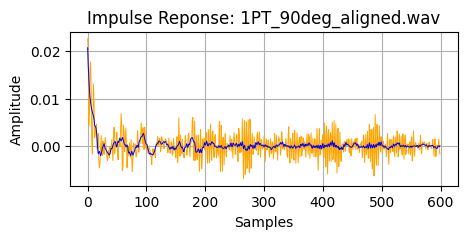

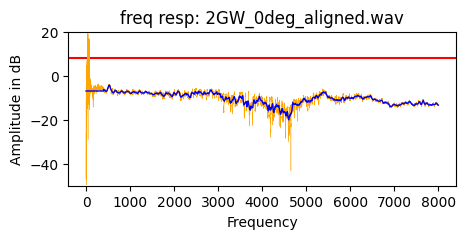

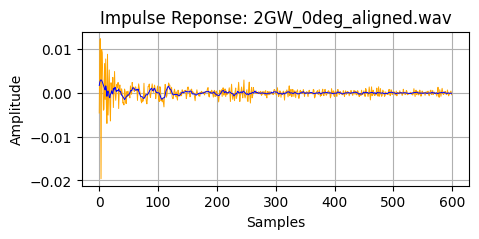

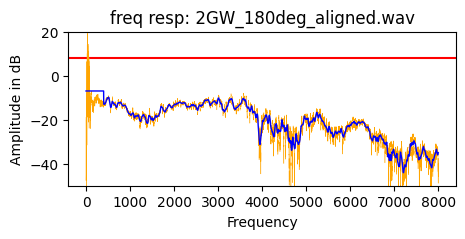

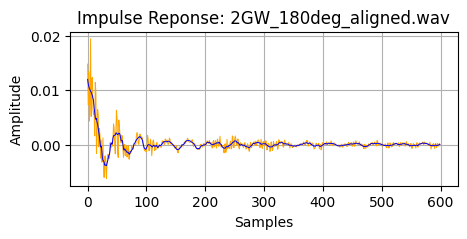

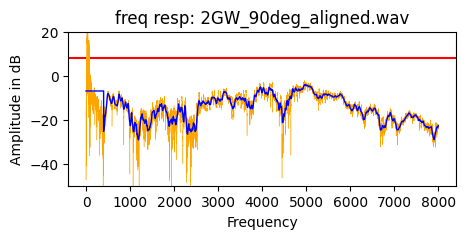

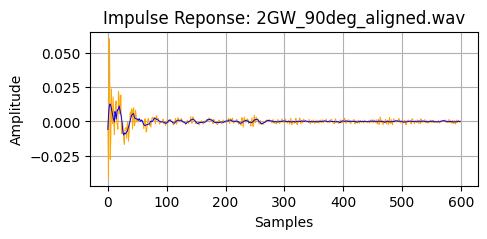

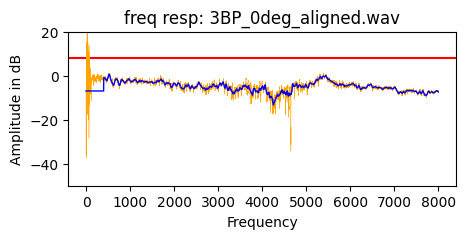

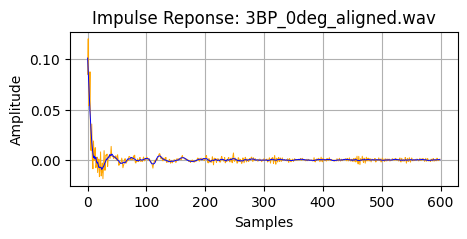

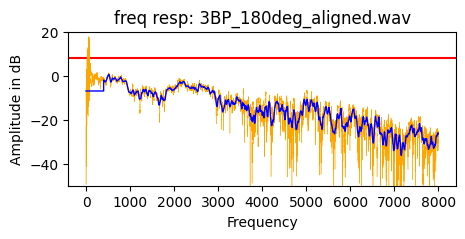

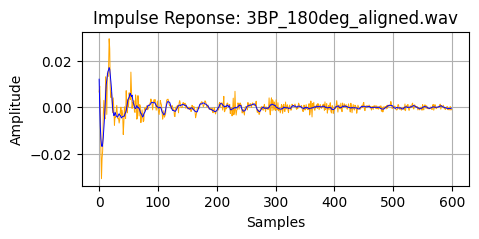

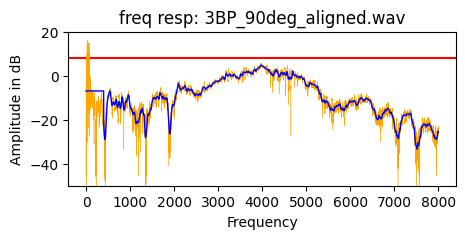

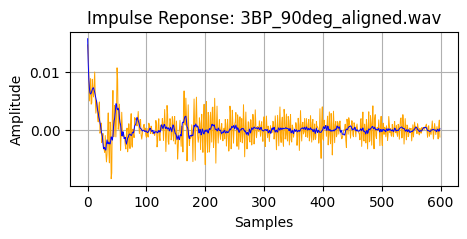

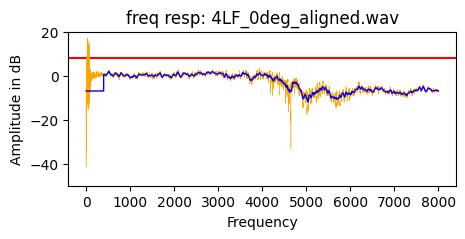

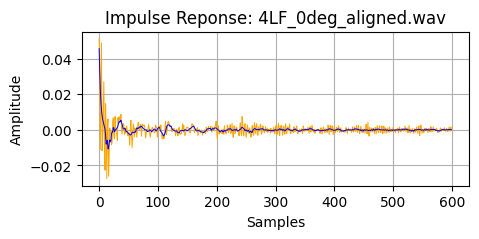

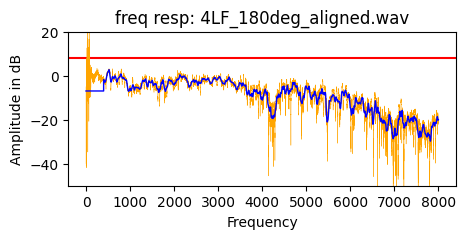

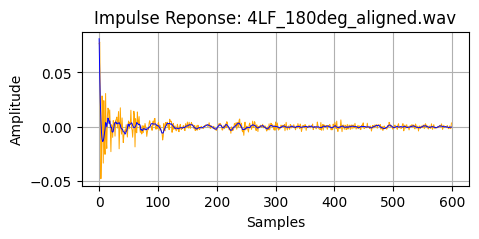

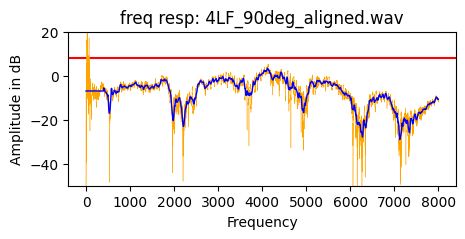

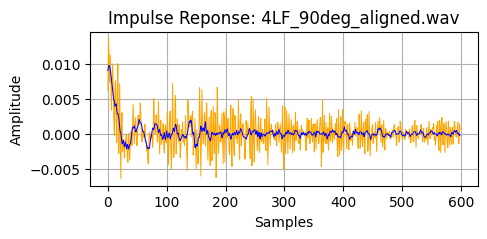

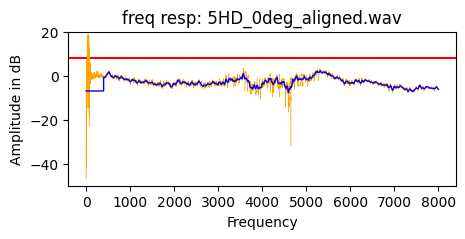

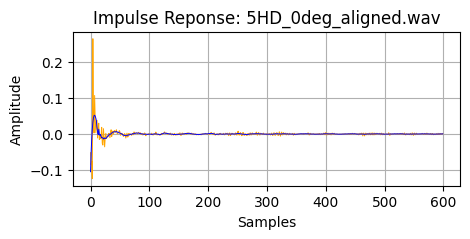

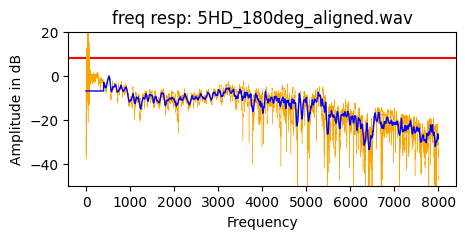

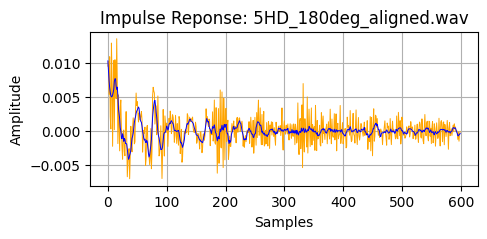

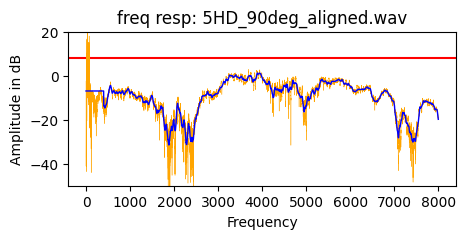

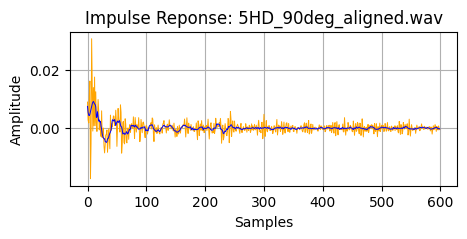

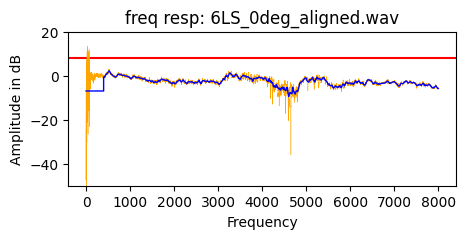

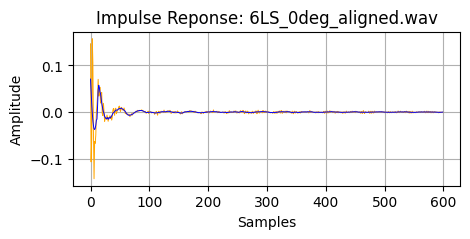

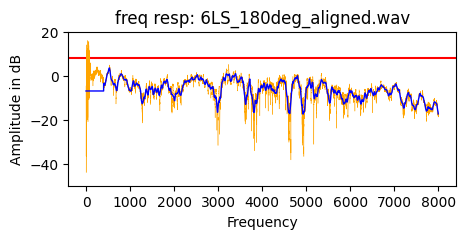

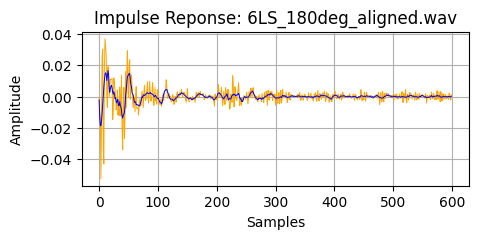

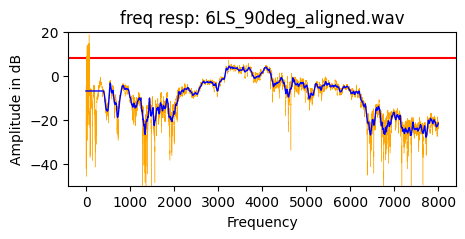

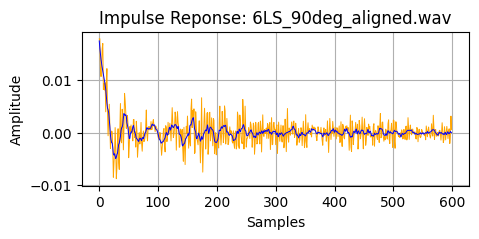

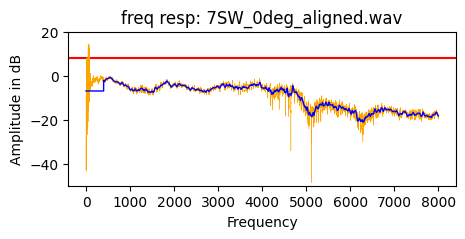

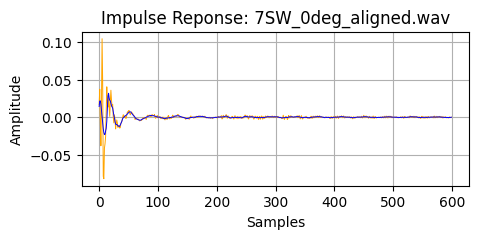

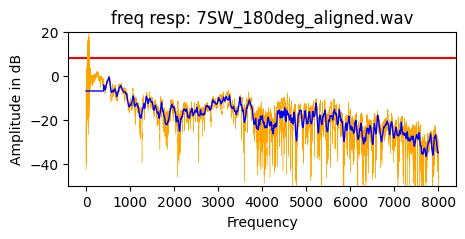

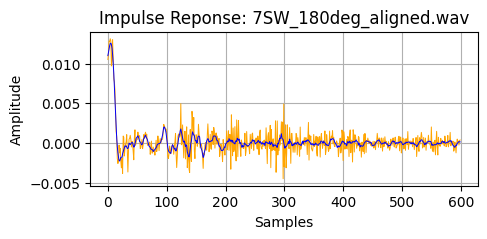

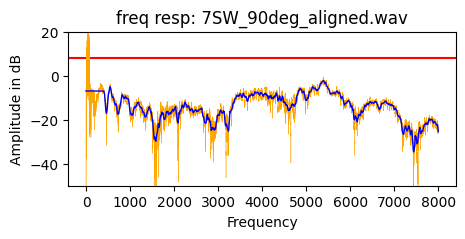

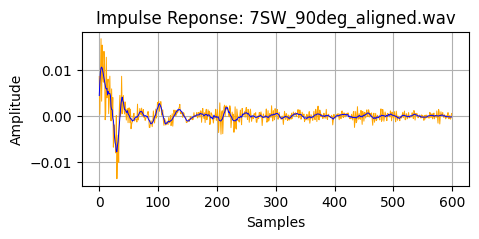

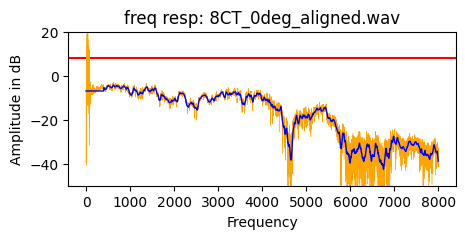

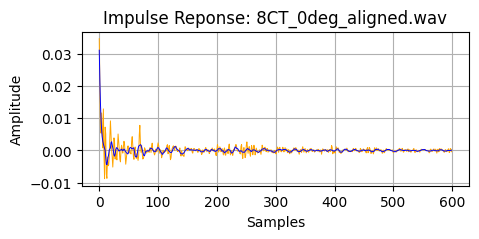

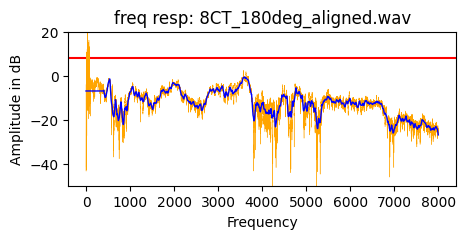

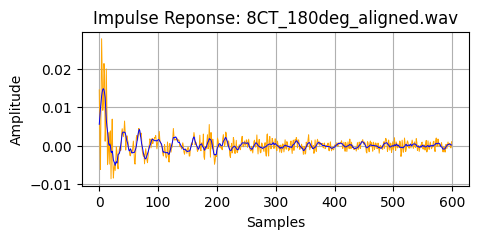

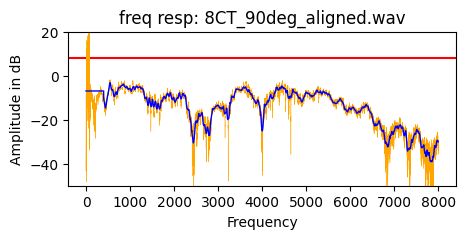

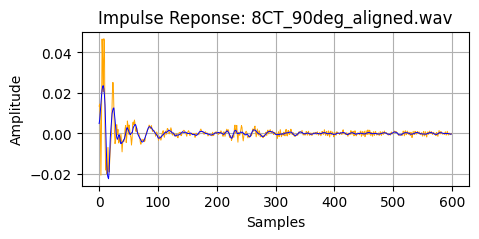

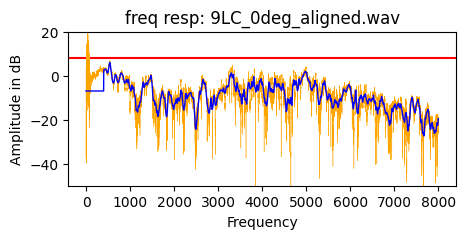

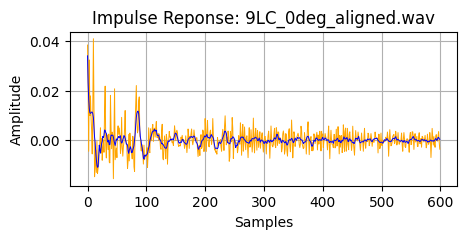

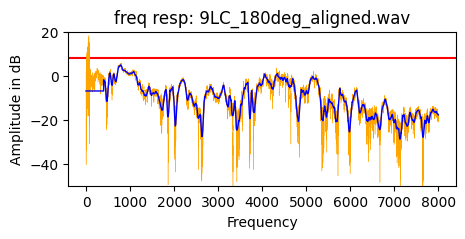

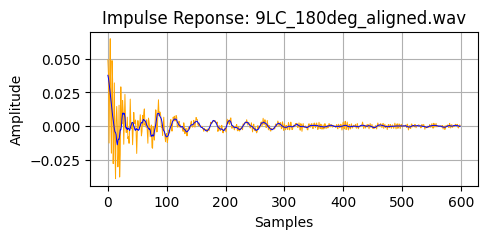

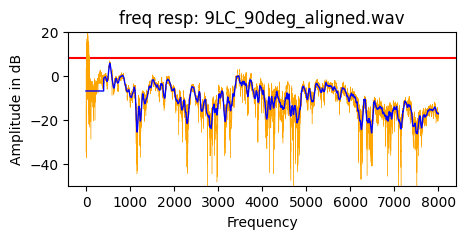

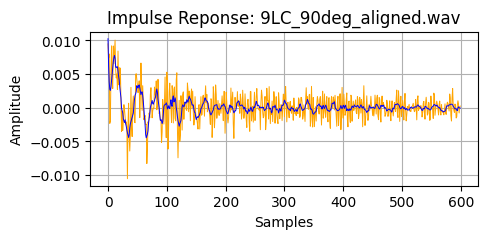

Skipping reference file ref_trimmed_0Clean_0deg_NoCover_aligned.wav...
IMPULSE COMPLETED! 

'But you don't need to use the claw when you pick a pear of the big pawpaw'


In [1]:
## change working folder to root
import os
os.chdir("/Users/angjunsiong/Desktop/FAST")

from src.ir_fr_generator import impulse_generator

impulse_generator(visualise_freq_response=True,
                  visualise_imp_response=True, 
                  suppress_low_freq_noise=True, 
                  just_preview_1=False)

#### Step 3: Reconvolve Audio with Calculated Impulse Response (Sanity Check)

A. Generate Simulated Audio by Convolving Frequency Response on Audio Recorded without Fabric Dampening

In [2]:
## Sample Clip 1: "Gump"

## Load in sample speech 1
file="Gump"
audio_data, sr = load_audio_with_pytorch("./data/Samples/raw_clips/Gump.wav")

# Convolve audio data with LongChamp Bag IRs
# Longchamp bags seemingly gives the most altered voices - good to showcase the impact of fabric dampening
convolved_audio_data_0, sr_conv = ir_convolve(audio_data=audio_data, 
                                       sr=sr, 
                                       mode="specific", 
                                       specific_ir_path="./data/Impulse_Responses/fabric_IRs/ir_9LC_0deg_aligned_smooth.npy")
convolved_audio_data_90, sr_conv = ir_convolve(audio_data=audio_data, 
                                        sr=sr, 
                                        mode="specific",
                                        specific_ir_path="./data/Impulse_Responses/fabric_IRs/ir_9LC_90deg_aligned_smooth.npy")
convolved_audio_data_180, sr_conv = ir_convolve(audio_data=audio_data, 
                                         sr=sr, 
                                         mode="specific",
                                         specific_ir_path="./data/Impulse_Responses/fabric_IRs/ir_9LC_180deg_aligned_smooth.npy")

# Peak-normalise volume
convolved_audio_data_0 = convolved_audio_data_0 / torch.max(torch.abs(convolved_audio_data_0))
convolved_audio_data_90 = convolved_audio_data_90 / torch.max(torch.abs(convolved_audio_data_90))
convolved_audio_data_180 = convolved_audio_data_180 / torch.max(torch.abs(convolved_audio_data_180))

# Export audios
torchaudio.save(f"./data/Samples/fabric_convolved_samples/{file}_convolved_0.wav", 
                src = convolved_audio_data_0, 
                format="wav", 
                encoding="PCM_S",
                sample_rate=sr_conv, 
                bits_per_sample=16)
torchaudio.save(f"./data/Samples/fabric_convolved_samples/{file}_convolved_90.wav", 
                src = convolved_audio_data_90, 
                format="wav", 
                encoding="PCM_S", 
                sample_rate=sr_conv, 
                bits_per_sample=16) 
torchaudio.save(f"./data/Samples/fabric_convolved_samples/{file}_convolved_180.wav", 
                src = convolved_audio_data_180, 
                format="wav", 
                encoding="PCM_S",
                sample_rate=sr_conv, 
                bits_per_sample=16)

Audio ./data/Samples/raw_clips/Gump.wav loaded!; Native Sampling_Rate: 44100Hz; Shape: torch.Size([351983, 1])
Audio ./data/Samples/raw_clips/Gump.wav resampled to 16000Hz


In [3]:
## Sample Clip 2: "GGD"

## Load in sample speech 1
file="GGD"
audio_data, sr = load_audio_with_pytorch("./data/Samples/raw_clips/GGD.wav")

# Convolve audio data with LongChamp Bag IRs
# Longchamp bags seemingly gives the most altered voices - good to showcase the impact of fabric dampening
convolved_audio_data_0, sr_conv = ir_convolve(audio_data=audio_data, 
                                       sr=sr, 
                                       mode="specific", 
                                       specific_ir_path="./data/Impulse_Responses/fabric_IRs/ir_9LC_0deg_aligned_smooth.npy")
convolved_audio_data_90, sr_conv = ir_convolve(audio_data=audio_data, 
                                        sr=sr, 
                                        mode="specific",
                                        specific_ir_path="./data/Impulse_Responses/fabric_IRs/ir_9LC_90deg_aligned_smooth.npy")
convolved_audio_data_180, sr_conv = ir_convolve(audio_data=audio_data, 
                                         sr=sr, 
                                         mode="specific",
                                         specific_ir_path="./data/Impulse_Responses/fabric_IRs/ir_9LC_180deg_aligned_smooth.npy")

# Peak-normalise volume
convolved_audio_data_0 = convolved_audio_data_0 / torch.max(torch.abs(convolved_audio_data_0))
convolved_audio_data_90 = convolved_audio_data_90 / torch.max(torch.abs(convolved_audio_data_90))
convolved_audio_data_180 = convolved_audio_data_180 / torch.max(torch.abs(convolved_audio_data_180))

# Export audios
torchaudio.save(f"./data/Samples/fabric_convolved_samples/{file}_convolved_0.wav", 
                src = convolved_audio_data_0, 
                format="wav", 
                encoding="PCM_S",
                sample_rate=sr_conv, 
                bits_per_sample=16)
torchaudio.save(f"./data/Samples/fabric_convolved_samples/{file}_convolved_90.wav", 
                src = convolved_audio_data_90, 
                format="wav", 
                encoding="PCM_S", 
                sample_rate=sr_conv, 
                bits_per_sample=16) 
torchaudio.save(f"./data/Samples/fabric_convolved_samples/{file}_convolved_180.wav", 
                src = convolved_audio_data_180, 
                format="wav", 
                encoding="PCM_S",
                sample_rate=sr_conv, 
                bits_per_sample=16)

Audio ./data/Samples/raw_clips/GGD.wav loaded!; Native Sampling_Rate: 44100Hz; Shape: torch.Size([690084, 1])
Audio ./data/Samples/raw_clips/GGD.wav resampled to 16000Hz


B. Visualise Effects of Convolution with Spectrograms

In [ ]:
# Sample: Ezekial
plot_specgram(audio_path="./src/Side_Studies/A_listening_tests/LongChamp_Listening_Test_Recorded/Ezekial_Orig.wav")
plot_specgram(audio_path="./src/Side_Studies/A_listening_tests/LongChamp_Listening_Test_Recorded/Ezekial_Longchamp_90deg.wav")
plot_specgram(audio_path="./src/Side_Studies/A_listening_tests/LongChamp_Listening_Test_Synthetic/Ezekial_convolved_90.wav")

In [ ]:
# Sample: PowerStation
plot_specgram(audio_path="./src/Side_Studies/A_listening_tests/LongChamp_Listening_Test_Recorded/PowerStation_Orig.wav")
plot_specgram(audio_path="./src/Side_Studies/A_listening_tests/LongChamp_Listening_Test_Recorded/PowerStation_Longchamp_90deg.wav")
plot_specgram(audio_path="./src/Side_Studies/A_listening_tests/LongChamp_Listening_Test_Synthetic/PowerStation_convolved_90.wav")

#### Convolve Your Own Audio!

In [ ]:
## Set path for original audio file and IR
audio_path= "/home/sysowner/Desktop/audio_synthesis/src/Side_Studies/A_listening_tests/LongChamp_Listening_Test_Recorded/PowerStation_Orig.wav"
ir_path = "/home/sysowner/Desktop/audio_synthesis/data/Impulse_Responses/fabric_IRs/ir_9LC_0deg_aligned_smooth.npy"

## Set path to export convolved audio
export_path="./src/Side_Studies/A_listening_tests/LongChamp_Listening_Test_Synthetic/testclip_convolved_0.wav"

In [ ]:
## Read audio and convolve with IR
audio_data, sr = load_audio_with_pytorch(audio_path)
# Convolve audio data with LongChamp Bag IRs
convolved_audio_data_0, sr_conv = ir_convolve(audio_data=audio_data, 
                                              sr=sr, 
                                              mode="specific", 
                                              specific_ir_path=ir_path)
# Peak Normalise volume
convolved_audio_data_0 = convolved_audio_data_0 / torch.max(torch.abs(convolved_audio_data_0))


In [ ]:
## Visualise spectogram before and after
plot_specgram(audio_path=audio_path)
plot_specgram(audio_path=export_path)

In [ ]:
## Export audio
torchaudio.save(export_path, 
                src = convolved_audio_data_0, 
                format="wav", 
                encoding="PCM_S",
                sample_rate=sr_conv, 
                bits_per_sample=16)